<a href="https://colab.research.google.com/github/AribArkaan/Clustering-Python/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mengimpor pustaka, memuat dataset, dan menampilkan dendrogram untuk menemukan jumlah cluster yang optimal.

Data Imported Successfully!


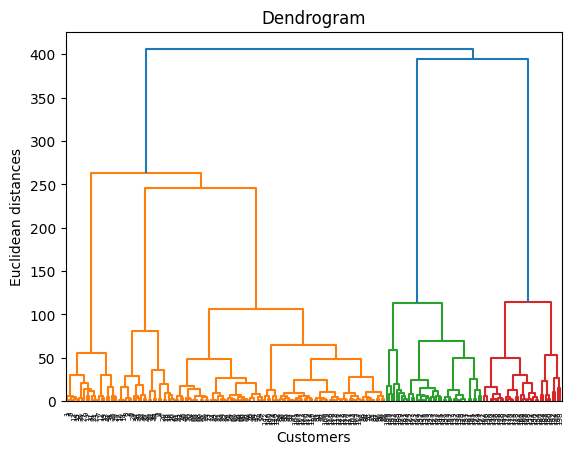

Dendrogram Plotted Successfully!


In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Load the dataset
dataset = pd.read_csv('/content/Mall_Customer.csv')
X = dataset.iloc[:, [3, 4]].values
print("Data Imported Successfully!")

# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
print("Dendrogram Plotted Successfully!")


# melakukan analisis dendrogram dan memilih jumlah optimal dari cluster berdasarkan hasil analisis dendrogram

In [ ]:
num_clusters = 3

agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
y_agg = agg_clustering.fit_predict(X)
print("Agglomerative Clustering Performed Successfully!")


Agglomerative Clustering Performed Successfully!


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# memilih jumlah cluster yang optimal berdasarkan dendrogram, dan kemudian menerapkan Agglomerative Clustering dengan jumlah cluster tersebut.

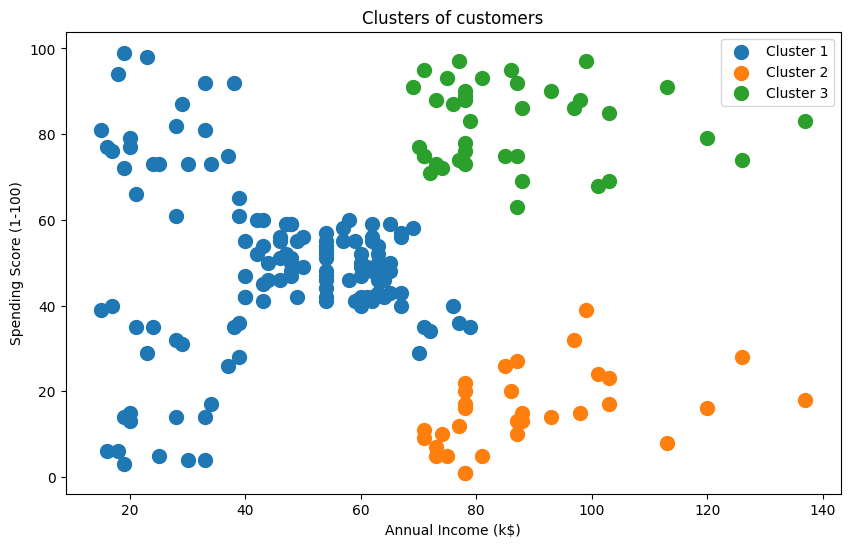

Clusters Visualized Successfully!


In [ ]:
# Visualising the clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X[y_agg == i, 0], X[y_agg == i, 1], s=100, label=f'Cluster {i+1}')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
print("Clusters Visualized Successfully!")


# memvisualisasikan hasil clustering untuk melihat bagaimana data dibagi menjadi cluster-cluster.

In [ ]:
# Adding cluster labels to the dataset
dataset['Cluster'] = y_agg

# Interpretation of the clusters
for cluster_num in range(num_clusters):
    cluster_data = dataset[dataset['Cluster'] == cluster_num]
    print(f"Cluster {cluster_num + 1}:")
    print(f"Number of customers in this cluster: {cluster_data.shape[0]}")
    print(f"Average Annual Income: {cluster_data['Annual Income (k$)'].mean()}")
    print(f"Average Spending Score: {cluster_data['Spending Score (1-100)'].mean()}")
    print("=============================================")


Cluster 1:
Number of customers in this cluster: 129
Average Annual Income: 45.55038759689923
Average Spending Score: 49.13178294573643
Cluster 2:
Number of customers in this cluster: 32
Average Annual Income: 89.40625
Average Spending Score: 15.59375
Cluster 3:
Number of customers in this cluster: 39
Average Annual Income: 86.53846153846153
Average Spending Score: 82.12820512820512


# menghitung Rata-Rata pendapatan tahunan serta rata-rata skor pengeluaran.

In [ ]:
# Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_agg)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X, y_agg)
print(f"Davies-Bouldin Index: {db_index}")


Silhouette Score: 0.4618340266628975
Davies-Bouldin Index: 0.7068435076376502
